In [1]:
import numpy as np
import pandas as pd
import json
from sklearn import cross_validation
from sklearn import neighbors
from sklearn import grid_search
from sklearn import metrics
from sklearn import cross_validation
from sklearn import grid_search
from sklearn import metrics
import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline

- **Requirements:**
   * Review the data set and project with an EIR during office hours.
* Practice importing (potentially unformatted) data into clean matrices|data frames, and if necessary, export into a form that makes sense (text files or a database, for example).
   * Explore the mathematical properties and visualize data through a python visualization tool (matplotlib and seaborn)
* Provide insight about the data set and any impact on a hypothesis.

- **Detailed Breakdown:**
   * A well organized IPython notebook with code and output
 * At least one visual for each independent variable and, if possible, its relationship to your dependent variable.
      * It's just as important to show what's not correlated as it is to show any actual correlations found.
      * Visuals should be well labeled and intuitive based on the data types.
        * For example, if your X variable is temperature and Y is "did it rain," a reasonable visual would be two histograms of temperature, one where it rained, and one where it didn't.
     * Tables are a perfectly valid visualization tool! Interweave them into your work.

- **Bonus:**
   - Share your analysis online. Jupyter makes this very simple and the setup should not take long.
 - Version control your code using Git and share your GitHub repo.
   - Try experimenting with other visualization languages; python/pandas-highcharts, plotly, 
    boken, or for a real challenge, d3 on its own. Interactive data analysis opens the doors for 
    others to easily interpret your work and explore the data themselves!

- **Submission:**
   - Completed code (`.py` or `.ipynb` file) and results (`.pdf` or `html` file) over Slack DM to instructor. 
    Please compress multiple files into a single zip file for submission. 
    In most cases we will not have access to your data and it is important for you to 
     share your results in a format that persists. 
    It is easy to download a completed IPython notebook with plots as a pdf or html file.

In [2]:
# load training set data
TS = pd.read_csv(r'C:\Users\roundce\Documents\DS-DC-13\FinalProject\Training_Set.csv')

#head
TS.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


Dataframe has multiple data sites with different types of data. The outcome variable is in the status_group column
is a binary outcome. There are 40 independent variables.

Please see the data dictionary below: 

amount_tsh - Total static head (amount water available to waterpoint)
date_recorded - The date the row was entered
funder - Who funded the well
gps_height - Altitude of the well
installer - Organization that installed the well
longitude - GPS coordinate
latitude - GPS coordinate
wpt_name - Name of the waterpoint if there is one
num_private - Could not recover any information on this variable and will remove it from analysis
basin - Geographic water basin
subvillage - Geographic location
region - Geographic location
region_code - Geographic location (coded)
district_code - Geographic location (coded)
lga - Geographic location
ward - Geographic location
population - Population around the well
public_meeting - True/False
recorded_by - Group entering this row of data
scheme_management - Who operates the waterpoint
scheme_name - Who operates the waterpoint
permit - If the waterpoint is permitted
construction_year - Year the waterpoint was constructed
extraction_type - The kind of extraction the waterpoint uses
extraction_type_group - The kind of extraction the waterpoint uses
extraction_type_class - The kind of extraction the waterpoint uses
management - How the waterpoint is managed
management_group - How the waterpoint is managed
payment - What the water costs
payment_type - What the water costs
water_quality - The quality of the water
quality_group - The quality of the water
quantity - The quantity of water
quantity_group - The quantity of water
source - The source of the water
source_type - The source of the water
source_class - The source of the water
waterpoint_type - The kind of waterpoint
waterpoint_type_group - The kind of waterpoint

In [3]:
#
TS.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


Removed the following variables becaues they were deemed unlikely to directly impact the likelihood of pump failure. 

ID of the individual pump
date_recorded - The date the row was entered
funder - Who funded the well
wpt_name - Name of the waterpoint if there is one
num_private - Could not recover any information on this variable and will remove it from analysis
public_meeting - True/False
recorded_by - Group entering this row of data

In [4]:
TS2 = pd.read_csv(r'C:\Users\roundce\Documents\DS-DC-13\FinalProject\Training_Set2.csv')

TS2.isnull().sum()

id                           0
amount_tsh                   0
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_group                0
quantity                     0
quantity_group               0
source                       0
source_type                  0
source_class                 0
waterpoi

In [5]:
#Dropped scheme name since nearly half of the training set lacked these values
TS3 = pd.read_csv(r'C:\Users\roundce\Documents\DS-DC-13\FinalProject\Training_Set3.csv')

#Dropped rows that didn't have values for scheme_management
TS4 = TS3.dropna()

#Check for missing values
TS4.isnull().sum()

id                       0
amount_tsh               0
gps_height               0
installer                0
longitude                0
latitude                 0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

In [6]:
#Count of remaining rows
TS4.count()

id                       50956
amount_tsh               50956
gps_height               50956
installer                50956
longitude                50956
latitude                 50956
basin                    50956
subvillage               50956
region                   50956
region_code              50956
district_code            50956
lga                      50956
ward                     50956
population               50956
scheme_management        50956
permit                   50956
construction_year        50956
extraction_type          50956
extraction_type_group    50956
extraction_type_class    50956
management               50956
management_group         50956
payment                  50956
payment_type             50956
water_quality            50956
quality_group            50956
quantity                 50956
quantity_group           50956
source                   50956
source_type              50956
source_class             50956
waterpoint_type          50956
waterpoi

In [7]:
#Datatypes for remaining variables
TS4.dtypes

id                         int64
amount_tsh               float64
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_cla

In [8]:
#The vast majority of remaining variables are categoricla in nature. Time to count the remaining rows.
TS4.count()

id                       50956
amount_tsh               50956
gps_height               50956
installer                50956
longitude                50956
latitude                 50956
basin                    50956
subvillage               50956
region                   50956
region_code              50956
district_code            50956
lga                      50956
ward                     50956
population               50956
scheme_management        50956
permit                   50956
construction_year        50956
extraction_type          50956
extraction_type_group    50956
extraction_type_class    50956
management               50956
management_group         50956
payment                  50956
payment_type             50956
water_quality            50956
quality_group            50956
quantity                 50956
quantity_group           50956
source                   50956
source_type              50956
source_class             50956
waterpoint_type          50956
waterpoi

Original data set contained 59401 rows. Proceeding forward with a grain of salt. Let's investigate
the numeric non-ordinal independent variables. 

In [9]:
TS4.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,1390,Roman,34.938093,-9.856322,Lake Nyasa,Mnyusi B,Iringa,11,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Nyamara,Mara,20,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,686,World vision,37.460664,-3.821329,Pangani,Majengo,Manyara,21,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
5,9944,20.0,0,DWE,39.172796,-4.765587,Pangani,Moa/Mwereme,Tanga,4,...,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional


In [10]:
TS4.describe()

,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,50956.000000,50956.000000,50956.000000,50956.000000,5.095600e+04,50956.000000,50956.000000,50956.000000,50956.000000
mean,37167.952017,346.371608,697.324849,34.029307,-5.664613e+00,14.957512,5.698132,177.549710,1344.262854
std,21447.926555,2773.720348,696.638465,6.794319,2.936314e+00,17.174732,9.625136,467.592011,936.687918
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,18591.750000,0.000000,0.000000,33.035964,-8.246765e+00,5.000000,2.000000,0.000000,0.000000
50%,37127.500000,0.000000,459.000000,35.050748,-4.949378e+00,12.000000,3.000000,35.000000,1988.000000
75%,55706.250000,33.000000,1331.000000,37.340380,-3.318178e+00,17.000000,5.000000,210.000000,2005.000000
max,74247.000000,250000.000000,2770.000000,40.323402,-2.000000e-08,99.000000,80.000000,30500.000000,2013.000000


We know that longitude, latitude, region_code, district_code, and construction year are not useful for this type of analysis. That said, amount_tsh, gps_height, and population are revealing. We know that there are areas where there are pumps where there is either no population or where population has not been recorded. 

In [11]:
# Plot a seaborn pairplot for relationship between features.  Save in Final Project folder
sns.set()
sns.set(style="whitegrid")
sns.set_context("poster")
g = sns.pairplot(TS4)
g.fig.suptitle('Scatter Plot of Basic Features', verticalalignment='top', fontsize=20)
plt.subplots_adjust(top=0.95)
g.set(xticklabels=[])
g.set(yticklabels=[])
plt.savefig("../DS-DC-13/FinalProject/"+,dpi=200)

SyntaxError: invalid syntax (<ipython-input-11-f78aa549d825>, line 10)

Since so much of the data is categorical and dummy variables would quickly become unwieldy, we're going to shy away from regression type techniques. We're going to look into using random forest next. 

In [12]:
#use label encoder to setup the random forest technique

# Check data types
print TS4.dtypes

id                         int64
amount_tsh               float64
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
scheme_management         object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_group             object
quantity                  object
quantity_group            object
source                    object
source_type               object
source_cla

In [13]:
#Make our pipeline
from sklearn import preprocessing
from sklearn import pipeline
le = preprocessing.LabelEncoder()

In [14]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [15]:
TS5 = MultiColumnLabelEncoder(columns = ['installer','basin','subvillage','region','district_code','lga','ward','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management',
                                   'management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type',
                                   'waterpoint_type_group','status_group']).fit_transform(TS4)

In [16]:

# Check data types
print TS5.dtypes

id                         int64
amount_tsh               float64
gps_height                 int64
installer                  int64
longitude                float64
latitude                 float64
basin                      int64
subvillage                 int64
region                     int64
region_code                int64
district_code              int64
lga                        int64
ward                       int64
population                 int64
scheme_management          int64
permit                     int64
construction_year          int64
extraction_type            int64
extraction_type_group      int64
extraction_type_class      int64
management                 int64
management_group           int64
payment                    int64
payment_type               int64
water_quality              int64
quality_group              int64
quantity                   int64
quantity_group             int64
source                     int64
source_type                int64
source_cla

In [17]:
#Set up test data

test = pd.read_csv(r'C:\Users\roundce\Documents\DS-DC-13\FinalProject\test_set_values2.csv')

In [18]:
#encode

test1 = MultiColumnLabelEncoder(columns = ['installer','basin','subvillage','region','district_code','lga','ward','scheme_management','permit','extraction_type','extraction_type_group','extraction_type_class','management',
                                   'management_group','payment','payment_type','water_quality','quality_group','quantity','quantity_group','source','source_type','source_class','waterpoint_type',
                                   'waterpoint_type_group']).fit_transform(test)


C:\Users\roundce\Anaconda2\lib\site-packages\numpy\lib\arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


In [19]:
print test1.dtypes

id                         int64
amount_tsh               float64
gps_height                 int64
installer                  int64
longitude                float64
latitude                 float64
basin                      int64
subvillage                 int64
region                     int64
region_code                int64
district_code              int64
lga                        int64
ward                       int64
population                 int64
scheme_management          int64
scheme_name               object
permit                     int64
construction_year          int64
extraction_type            int64
extraction_type_group      int64
extraction_type_class      int64
management                 int64
management_group           int64
payment                    int64
payment_type               int64
water_quality              int64
quality_group              int64
quantity                   int64
quantity_group             int64
source                     int64
source_typ

In [20]:
print TS5.columns

Index([u'id', u'amount_tsh', u'gps_height', u'installer', u'longitude',
       u'latitude', u'basin', u'subvillage', u'region', u'region_code',
       u'district_code', u'lga', u'ward', u'population', u'scheme_management',
       u'permit', u'construction_year', u'extraction_type',
       u'extraction_type_group', u'extraction_type_class', u'management',
       u'management_group', u'payment', u'payment_type', u'water_quality',
       u'quality_group', u'quantity', u'quantity_group', u'source',
       u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')


## Part 4. Build a Model

Create a cross validation split, select and build a model, evaluate the model, and refine the model

In [21]:
#Set features for use
feature = TS5[[u'id', u"amount_tsh", u'gps_height', u'installer', u'longitude', u'latitude',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'scheme_management', u'permit',
       u'construction_year', u'extraction_type', u'extraction_type_group',
       u'extraction_type_class', u'management', u'management_group',
       u'payment', u'payment_type', u'water_quality', u'quality_group',
       u'quantity', u'quantity_group', u'source', u'source_type',
       u'source_class', u'waterpoint_type', u'waterpoint_type_group',]]


#set target
target = TS5[['status_group']]


#set x and y

x = feature
y = np.ravel(target)

In [22]:
# Create separate training and test sets with 60/40 train/test split
X_train, X_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.4, random_state=42)

In [23]:
print test1.head()

      id  amount_tsh  gps_height  installer  longitude   latitude  basin  \
0  50785         0.0        1996        215  35.290799  -4.059696      0   
1  51630         0.0        1569        222  36.656709  -3.309214      5   
2  17168         0.0        1567          0  34.767863  -5.004344      0   
3  45559         0.0         267        263  38.058046  -9.418672      7   
4  49871       500.0        1260         76  35.006123 -10.950412      7   

   subvillage  region  region_code          ...            payment_type  \
0        3917       8           21          ...                       2   
1        2718       0            2          ...                       2   
2        5399      18           13          ...                       2   
3        2796       7           80          ...                       6   
4        3545      16           10          ...                       1   

   water_quality  quality_group  quantity  quantity_group source  source_type  \
0          

In [24]:
TS5.head()

,id,amount_tsh,gps_height,installer,longitude,latitude,basin,subvillage,region,region_code,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,1390,1344,34.938093,-9.856322,1,10335,3,11,...,6,2,1,1,8,6,0,1,1,0
1,8776,0.0,1399,489,34.698766,-2.147466,4,13888,9,20,...,6,2,2,2,5,3,1,1,1,0
2,34310,25.0,686,1824,37.460664,-3.821329,5,7952,8,21,...,6,2,1,1,0,1,1,2,1,0
3,67743,0.0,263,1641,38.486161,-11.155298,7,7875,12,90,...,6,2,0,0,3,0,0,2,1,2
5,9944,20.0,0,346,39.172796,-4.765587,5,10339,20,4,...,4,4,1,1,4,2,2,2,1,0


### Build a model

In [25]:
from sklearn import ensemble

# Instantiate model
rf = ensemble.RandomForestClassifier(n_estimators=20)

# Train model on training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
# Evaluate model on train set
print "Accuracy: %0.3f" % rf.score(X_train, y_train)

# Evaluate model on test set
print "Accuracy: %0.3f" % rf.score(X_test, y_test)

Accuracy: 0.996
Accuracy: 0.800


In [27]:
# Set list of values to grid search over
n = [1, 2, 3, 10, 20, 30, 100, 200, 300]
params = {'n_estimators': n}

# Perform grid search using list of values
gs = grid_search.GridSearchCV(
    estimator=ensemble.RandomForestClassifier(),
    param_grid=params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 2, 3, 10, 20, 30, 100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Best Params:
{'n_estimators': 200}
Accuracy of current model: 0.800
Accuracy using best param: 0.798


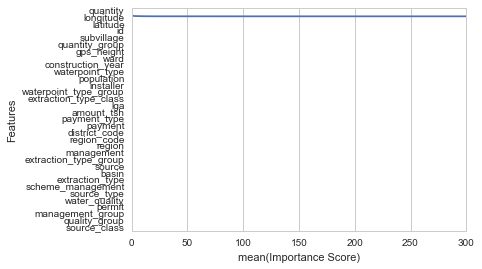

In [28]:
# Get best value to use
print "Best Params:"
print gs.best_params_

# Get improvement
print "Accuracy of current model: %0.3f" % rf.score(X_test, y_test)
print "Accuracy using best param: %0.3f" % gs.best_score_

# Plot scores
plt.plot(n, [s[1] for s in gs.grid_scores_])

# Plot importances for all features
features = x.columns
feature_importances = rf.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)

sns.barplot(y='Features', x='Importance Score', data=features_df)

In [29]:
rf.predict(test1)

ValueError: could not convert string to float: DANIDA

In [ ]:
y